---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if B is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10,9))
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

<IPython.core.display.Javascript object>


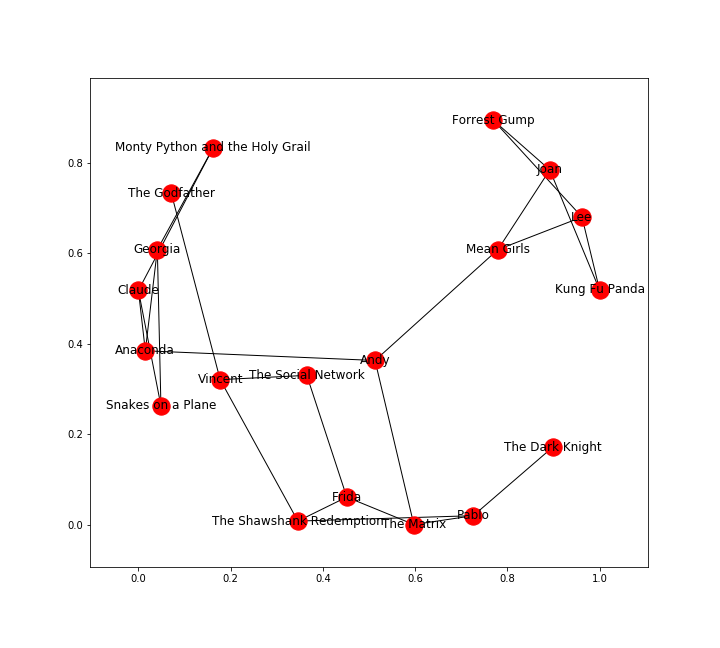

C:\FAST\anaconda\python27\win64\431\envs\py36\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\FAST\anaconda\python27\win64\431\envs\py36\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\FAST\anaconda\python27\win64\431\envs\py36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


[('Andy', 'Anaconda', {}),
 ('Andy', 'Mean Girls', {}),
 ('Andy', 'The Matrix', {}),
 ('Anaconda', 'Claude', {}),
 ('Anaconda', 'Georgia', {}),
 ('Mean Girls', 'Joan', {}),
 ('Mean Girls', 'Lee', {}),
 ('The Matrix', 'Frida', {}),
 ('The Matrix', 'Pablo', {}),
 ('Claude', 'Monty Python and the Holy Grail', {}),
 ('Claude', 'Snakes on a Plane', {}),
 ('Monty Python and the Holy Grail', 'Georgia', {}),
 ('Snakes on a Plane', 'Georgia', {}),
 ('Frida', 'The Shawshank Redemption', {}),
 ('Frida', 'The Social Network', {}),
 ('The Shawshank Redemption', 'Pablo', {}),
 ('The Shawshank Redemption', 'Vincent', {}),
 ('The Social Network', 'Vincent', {}),
 ('Joan', 'Forrest Gump', {}),
 ('Joan', 'Kung Fu Panda', {}),
 ('Forrest Gump', 'Lee', {}),
 ('Kung Fu Panda', 'Lee', {}),
 ('Pablo', 'The Dark Knight', {}),
 ('Vincent', 'The Godfather', {})]

In [101]:
def answer_one():
    B = nx.read_edgelist('Employee_Movie_Choices.txt', delimiter='\t')
    return B

G = answer_one()
plot_graph(G)
G.edges(data=True)

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

<IPython.core.display.Javascript object>


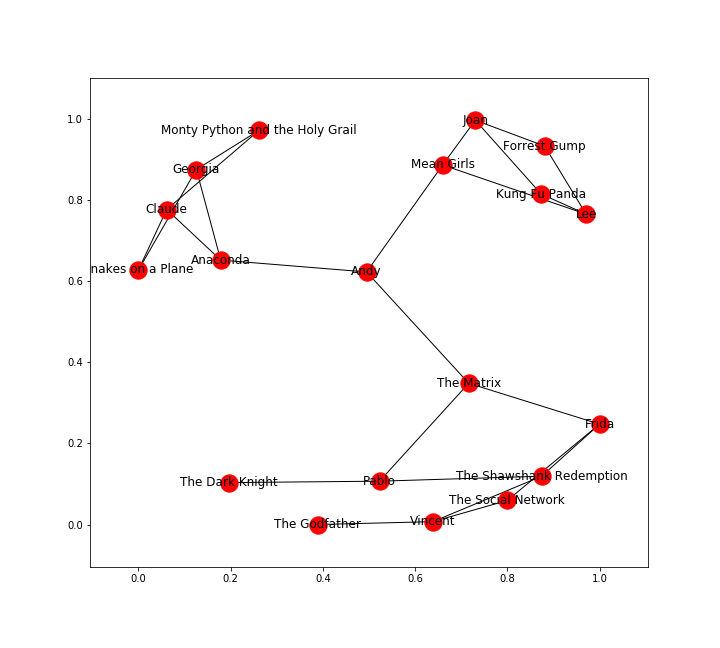

C:\FAST\anaconda\python27\win64\431\envs\py36\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\FAST\anaconda\python27\win64\431\envs\py36\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\FAST\anaconda\python27\win64\431\envs\py36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


[('Andy', 'Anaconda', {}),
 ('Andy', 'Mean Girls', {}),
 ('Andy', 'The Matrix', {}),
 ('Anaconda', 'Claude', {}),
 ('Anaconda', 'Georgia', {}),
 ('Mean Girls', 'Joan', {}),
 ('Mean Girls', 'Lee', {}),
 ('The Matrix', 'Frida', {}),
 ('The Matrix', 'Pablo', {}),
 ('Claude', 'Monty Python and the Holy Grail', {}),
 ('Claude', 'Snakes on a Plane', {}),
 ('Monty Python and the Holy Grail', 'Georgia', {}),
 ('Snakes on a Plane', 'Georgia', {}),
 ('Frida', 'The Shawshank Redemption', {}),
 ('Frida', 'The Social Network', {}),
 ('The Shawshank Redemption', 'Pablo', {}),
 ('The Shawshank Redemption', 'Vincent', {}),
 ('The Social Network', 'Vincent', {}),
 ('Joan', 'Forrest Gump', {}),
 ('Joan', 'Kung Fu Panda', {}),
 ('Forrest Gump', 'Lee', {}),
 ('Kung Fu Panda', 'Lee', {}),
 ('Pablo', 'The Dark Knight', {}),
 ('Vincent', 'The Godfather', {})]

In [102]:
def answer_two():
    B = answer_one()

    for node in B.nodes():
        if node in movies:
            B.node[node]['type'] = 'movie'
        elif node in employees:
            B.node[node]['type'] = 'employee'

    return B

G = answer_two()
plot_graph(G)
G.edges(data=True)

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

<IPython.core.display.Javascript object>


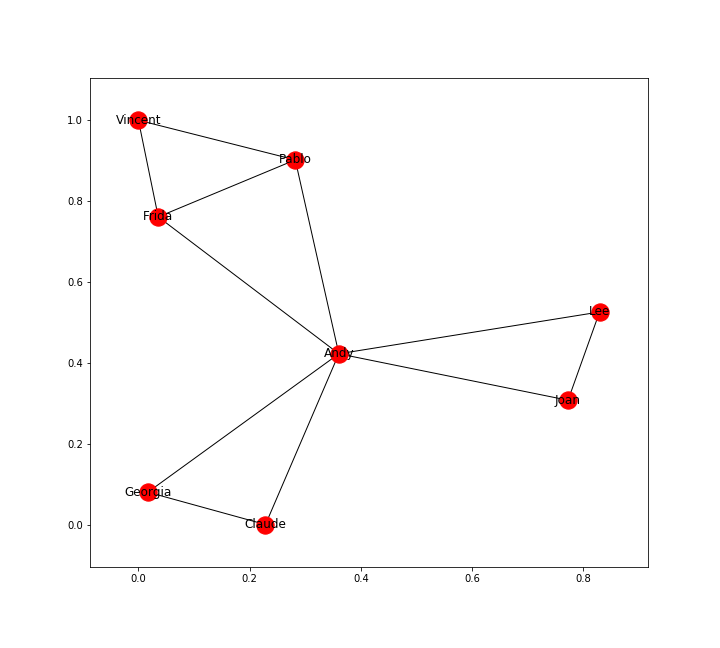

C:\FAST\anaconda\python27\win64\431\envs\py36\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\FAST\anaconda\python27\win64\431\envs\py36\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\FAST\anaconda\python27\win64\431\envs\py36\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


[('Claude', 'Georgia', {'weight': 3}),
 ('Claude', 'Andy', {'weight': 1}),
 ('Pablo', 'Frida', {'weight': 2}),
 ('Pablo', 'Vincent', {'weight': 1}),
 ('Pablo', 'Andy', {'weight': 1}),
 ('Georgia', 'Andy', {'weight': 1}),
 ('Andy', 'Lee', {'weight': 1}),
 ('Andy', 'Frida', {'weight': 1}),
 ('Andy', 'Joan', {'weight': 1}),
 ('Lee', 'Joan', {'weight': 3}),
 ('Frida', 'Vincent', {'weight': 2})]

In [103]:
def answer_three():
    B = answer_two()
    G  = bipartite.weighted_projected_graph(B, employees)
    
    return G

G = answer_three()
plot_graph(G)
G.edges(data=True)

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [145]:
def answer_four():
    G1 = answer_three()
    G2 = nx.read_edgelist('Employee_Relationships.txt', data=[('score', int)])
    G3 = nx.compose(G1, G2)

    tmp_data = []
    for n1, adj in G3.adjacency_iter():
        for n2, attr in adj.items():
            weight = attr.get('weight')
            score = attr.get('score')
            tmp_data.append({'n1': n1, 'n2': n2, 'weight': weight, 'score': score})

    df = pd.DataFrame(tmp_data)
    df = df.fillna(0)
    corr = df[['score', 'weight']].corr().iloc[0, 1]
    
    return corr

answer_four()

0.7883962221733477